In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import axes3d, Axes3D
from computeCost import *
from gradientDescent import *
from plotData import *

Plotting Data...


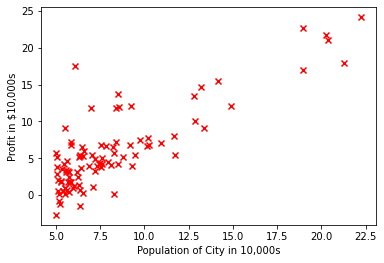

Running Gradient Descent...
Initial cost : 32.072733877455676 (This value should be about 32.07)
Theta found by gradient descent: [-3.63029144  1.16636235]
For population = 35,000, we predict a profit of 4519.768 (This value should be about 4519.77)
For population = 70,000, we predict a profit of 45342.450 (This value should be about 45342.45)


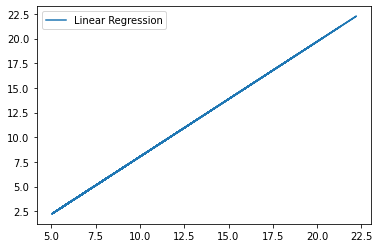

In [4]:
# ===================== Part 1: Plotting =====================
print('Plotting Data...')
data = np.loadtxt('ex1data1.txt', delimiter=',', usecols=(0, 1))
X = data[:, 0]
y = data[:, 1]
m = y.size

plt.ion()
plt.figure(0)
plot_data(X, y)


# ===================== Part 2: Gradient descent =====================
print('Running Gradient Descent...')

X_with_interception = np.c_[np.ones(m), X]  # Add a column of ones to X
theta = np.zeros(2)  # initialize fitting parameters

# Some gradient descent settings
iterations = 1500
alpha = 0.01

# Compute and display initial cost
print('Initial cost : ' + str(compute_cost(X_with_interception, y, theta)) + ' (This value should be about 32.07)')

theta, J_history = gradient_descent(X_with_interception, y, theta, alpha, iterations)

print('Theta found by gradient descent: ' + str(theta.reshape(2)))

# Plot the linear fit
plt.figure(0)
line1, = plt.plot(X_with_interception[:, 1], np.dot(X_with_interception, theta), label='Linear Regression')
plt.legend(handles=[line1])


# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot(np.array([1, 3.5]), theta)
print('For population = 35,000, we predict a profit of {:0.3f} (This value should be about 4519.77)'.format(predict1*10000))
predict2 = np.dot(np.array([1, 7]), theta)
print('For population = 70,000, we predict a profit of {:0.3f} (This value should be about 45342.45)'.format(predict2*10000))

Visualizing J(theta0, theta1) ...


/var/folders/xc/kfk35vpj1_x543pqplxyym9w0000gn/T/ipykernel_88448/3016948997.py:19: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig1.gca(projection='3d')


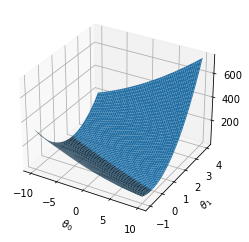

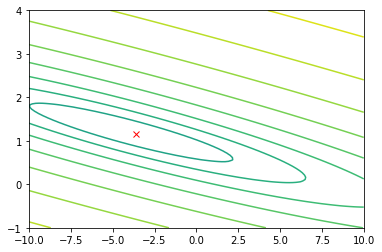

In [6]:
# ===================== Part 3: Visualizing J(theta0, theta1) =====================
print('Visualizing J(theta0, theta1) ...')

theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

xs, ys = np.meshgrid(theta0_vals, theta1_vals)
J_vals = np.zeros(xs.shape)

# Fill out J_vals
for i in range(0, theta0_vals.size):
    for j in range(0, theta1_vals.size):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i][j] = compute_cost(X_with_interception, y, t)

J_vals = np.transpose(J_vals)

fig1 = plt.figure(1)
ax = fig1.gca(projection='3d')
ax.plot_surface(xs, ys, J_vals)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')

plt.figure(2)
lvls = np.logspace(-2, 3, 20)
plt.contour(xs, ys, J_vals, levels=lvls, norm=LogNorm())
plt.plot(theta[0], theta[1], c='r', marker="x")